# setup

In [1]:
!pip install transformers==4.38.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.4 MB/s eta 0:00:00


In [2]:
!pip install datasets evaluate accelerate eyecite --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.0/854.0 kB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.8/168.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/projects/us_supreme_court

/content/drive/MyDrive/projects/us_supreme_court


In [5]:
from utils.pre_train import *
from utils.notebook_utils import *

%load_ext autoreload
%autoreload 2

# Read from Hub

In [6]:
import os
from huggingface_hub import notebook_login
notebook_login()

In [7]:
dataset = load_dataset("raminass/opinions-94-23")
opinions = pd.DataFrame(dataset["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4619 [00:00<?, ? examples/s]

In [ ]:
opinions.author.value_counts()

author
Thomas        571
Scalia        473
Breyer        443
Stevens       407
Ginsburg      390
Kennedy       326
Alito         286
Souter        230
Sotomayor     226
Gorsuch       168
O'Connor      167
Kavanaugh     160
Kagan         145
Rehnquist     144
per_curiam    140
Roberts       123
Barrett       122
Jackson        98
Name: count, dtype: int64

# Filter Data

In [8]:
opinions=opinions[opinions.author!='per_curiam']

In [ ]:
# opinions = opinions[~opinions.author.isin(['Jackson', 'Barrett'])] # 15 model
# opinions = opinions[~opinions.author.isin(['Jackson', 'Barrett', 'Kavanaugh'])] # 14 model

In [ ]:
opinions.type.value_counts()

type
majority      2304
dissenting    1327
concurring     848
Name: count, dtype: int64

In [ ]:
opinions.author.value_counts()

author
Thomas       571
Scalia       473
Breyer       443
Stevens      407
Ginsburg     390
Kennedy      326
Alito        286
Souter       230
Sotomayor    226
Gorsuch      168
O'Connor     167
Kavanaugh    160
Kagan        145
Rehnquist    144
Roberts      123
Barrett      122
Jackson       98
Name: count, dtype: int64

# Add Labels

In [9]:
id2label, label2id = get_labels_maping(opinions)

In [10]:
opinions["label"] = opinions["author"].map(label2id)

In [ ]:
opinions.sample(3)

,case_name,text,year,author,type,clean_text,label
2263,Sims v. Apfel,A person whose claim for Social Security benef...,2000,Thomas,majority,A person whose claim for Social Security benef...,9
672,"Jones v. Mississippi, 18-1259","Under Miller v. Alabama, \n\n567 U. S. 460\n\n...",2021,Kavanaugh,majority,"Under (2012), an indi- vidual who commits a ho...",3
3581,Pharmaceutical Research and Manufacturers of A...,13\n In response to increasing Medicaid e...,2003,Stevens,majority,13 In response to increasing Medicaid expendit...,13


In [ ]:
import json
with open("data/j_year.json", "r") as j:
    judges_by_year = json.loads(j.read())
labels_by_year = {k: [label2id[item] for item in v] for k,v in judges_by_year.items()}

# Train-Test

In [11]:
from sklearn.model_selection import train_test_split
opinions_train, opinions_test = train_test_split(opinions, random_state=2024, test_size=0.2, stratify=opinions['label'])
# opinions_train, opinions_test = train_test_split(opinions, test_size=0.2, stratify=opinions['label'])

In [ ]:
opinions_test.author.value_counts()

author
Thomas       114
Scalia        95
Breyer        89
Stevens       81
Ginsburg      78
Kennedy       65
Alito         57
Souter        46
Sotomayor     45
Gorsuch       34
O'Connor      33
Kavanaugh     32
Rehnquist     29
Kagan         29
Roberts       25
Barrett       24
Jackson       20
Name: count, dtype: int64

In [ ]:
opinions_train.author.value_counts()

author
Thomas       457
Scalia       378
Breyer       354
Stevens      326
Ginsburg     312
Kennedy      261
Alito        229
Souter       184
Sotomayor    181
O'Connor     134
Gorsuch      134
Kavanaugh    128
Kagan        116
Rehnquist    115
Roberts       98
Barrett       98
Jackson       78
Name: count, dtype: int64

# Split Paragraphs

In [ ]:
# opinions_train = opinions

In [12]:
par_train = split_data(opinions_train, id2label, label2id)
par_test = split_data(opinions_test, id2label, label2id)
# par_test = par_train

In [ ]:
par_train.author.value_counts()

Thomas       3998
Breyer       3420
Scalia       3334
Kennedy      3072
Alito        2920
Ginsburg     2833
Stevens      2271
Sotomayor    2037
Souter       1750
Kagan        1542
O'Connor     1296
Jackson      1214
Gorsuch      1206
Roberts      1124
Kavanaugh    1100
Rehnquist     848
Barrett       745
Name: author, dtype: int64

In [ ]:
par_test.author.value_counts()

Breyer       960
Thomas       941
Kennedy      910
Ginsburg     756
Scalia       751
Alito        662
Stevens      569
Sotomayor    496
Souter       466
Kagan        371
O'Connor     365
Gorsuch      352
Roberts      327
Kavanaugh    275
Rehnquist    237
Jackson      220
Barrett      176
Name: author, dtype: int64

In [ ]:
# par_train = par_train.groupby('author',as_index = False,group_keys=False).apply(lambda s: s.sample(2000, replace=len(s)<2000))

In [ ]:
par_train.author.value_counts()

Thomas       3998
Breyer       3420
Scalia       3334
Kennedy      3072
Alito        2920
Ginsburg     2833
Stevens      2271
Sotomayor    2037
Souter       1750
Kagan        1542
O'Connor     1296
Jackson      1214
Gorsuch      1206
Roberts      1124
Kavanaugh    1100
Rehnquist     848
Barrett       745
Name: author, dtype: int64

In [ ]:
# par_test = par_test.groupby('author',as_index = False,group_keys=False).apply(lambda s: s.sample(400, replace=len(s)<400))

In [ ]:
par_test.author.value_counts()

Breyer       960
Thomas       941
Kennedy      910
Ginsburg     756
Scalia       751
Alito        662
Stevens      569
Sotomayor    496
Souter       466
Kagan        371
O'Connor     365
Gorsuch      352
Roberts      327
Kavanaugh    275
Rehnquist    237
Jackson      220
Barrett      176
Name: author, dtype: int64

# Model

In [13]:
from utils import train
from transformers import set_seed
set_seed(1004)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()
ds_dict = {
        "train": Dataset.from_pandas(
            par_train[["label", "text"]], preserve_index=False
        ),
        "test": Dataset.from_pandas(
            par_test[["label", "text"]], preserve_index=False
        ),
    }
ds = DatasetDict(ds_dict)
tokenized_court = train.tokenize_dataset(ds)

In [ ]:
 trainer = train.get_trainer(
        id2label,
        label2id,
        tokenized_court,
        epochs=3,
        model_name=f"M4-eval",
        batch_size=16,
        push_to_hub=True,
    )
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at raminass/scotus-v10 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([13, 512]) in the checkpoint and torch.Size([17, 512]) in the model instantiated
- classifier.bias: found shape torch.Size([13]) in the checkpoint and torch.Size([17]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_samp

Epoch,Training Loss,Validation Loss,Accuracy
1,0.799200,1.001237,0.706249


Checkpoint destination directory M4-eval/checkpoint-2170 already exists and is non-empty. Saving will proceed but saved results may be invalid.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.799200,1.001237,0.706249
2,0.441600,0.918866,0.738284
3,0.269500,0.910466,0.748132


Checkpoint destination directory M4-eval/checkpoint-4340 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory M4-eval/checkpoint-6510 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=6510, training_loss=0.6363908759643039, metrics={'train_runtime': 2846.6077, 'train_samples_per_second': 36.58, 'train_steps_per_second': 2.287, 'total_flos': 6137584409548800.0, 'train_loss': 0.6363908759643039, 'epoch': 3.0})

In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/raminass/M4-eval/commit/2f602869700acae863db45b9790249fdca0f865d', commit_message='End of training', commit_description='', oid='2f602869700acae863db45b9790249fdca0f865d', pr_url=None, pr_revision=None, pr_num=None)

# Analysis

## Load from Hub

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name_or_path = "raminass/M4-eval" #path/to/your/model/or/name/on/hub
# model_name_or_path = "raminass/M4" #path/to/your/model/or/name/on/hub
device = "cuda" # or "cuda" if you have a GPU
model = AutoModelForSequenceClassification.from_pretrained(model_name_or_path).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/140M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/702k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [16]:
from scipy.special import softmax
pred = []
for index, row in opinions_test.iterrows():
  chunks = split_text(row["clean_text"])
  list_ds = [model(tokenizer.encode(c, return_tensors="pt", padding=True, truncation=True).to(device)).logits[0].detach().cpu().numpy() for c in chunks]
  pred.append(list_ds)

In [17]:
res = []
p = []
i = 0
for index, row in opinions_test.iterrows():
  avg = softmax(pred[i], axis=1).mean(axis=0)
  res.append(np.argmax(avg))
  p.append(np.max(avg))
  i+=1
(res == opinions_test['label']).mean()

0.9084821428571429

In [18]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.4]
np.mean(new_acc)

0.9359129383313181

In [19]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.5]
np.mean(new_acc)

0.9545454545454546

In [20]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.6]
np.mean(new_acc)

0.9618768328445748

In [21]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.7]
np.mean(new_acc)

0.9696969696969697

In [22]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.8]
np.mean(new_acc)

0.9639065817409767

In [23]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if x>0.9]
np.mean(new_acc)

0.9646302250803859

In [ ]:
# latest court
from scipy.special import softmax
y = 2022
pred = []
for index, row in opinions_test[opinions_test.year>y].iterrows():
  chunks = split_text(row["clean_text"])
  list_ds = [model(tokenizer.encode(c, return_tensors="pt", padding=True, truncation=True).to(device)).logits[0].detach().cpu().numpy() for c in chunks]
  pred.append(list_ds)
res = []
p = []
i = 0
for index, row in opinions_test[opinions_test.year>y].iterrows():
  avg = softmax(pred[i], axis=1).mean(axis=0)
  res.append(np.argmax(avg))
  p.append(np.max(avg))
  i+=1
(res == opinions_test[opinions_test.year>y]['label']).mean()

0.8214285714285714

In [ ]:
# threshold check
new_acc = [bool_value for x, bool_value in zip(p, (res == opinions_test[opinions_test.year>y]['label']).tolist()) if x>0.4]
np.mean(new_acc)

0.8636363636363636

In [ ]:
res = []
top2 = []
i = 0
for index, row in opinions_test.iterrows():
  avg = softmax(pred[i], axis=1).mean(axis=0)
  top2.append(np.sort(avg)[-2:].sum())
  res.append(np.argsort(avg)[-2:])
  i+=1
matching = [opinions_test.iloc[i]['label'] in res[i].tolist() for i in range(len(res))]
# np.mean(matching)
new_acc = [bool_value for x, bool_value in zip(top2, matching) if x>0.5]
np.mean(new_acc)

0.976457399103139

In [ ]:
data = [x for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if bool_value]

In [ ]:
x = np.min(data)
print(x)

0.28706706


In [ ]:
np.mean(data<np.float32(0.3))*100

0.9828009828009828

In [ ]:
incorrect = [x for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if not bool_value]

In [ ]:
np.min(incorrect)

0.19970481

In [ ]:
np.mean(incorrect<np.float32(0.3))

0.15853658536585366

## Percuriams

In [ ]:
per_curiams=opinions[opinions.author=='per_curiam']
from scipy.special import softmax
pred = []
for index, row in per_curiams.iterrows():
  chunks = split_text(row["clean_text"])
  list_ds = [model(tokenizer.encode(c, return_tensors="pt", padding=True, truncation=True).to(device)).logits[0].detach().cpu().numpy() for c in chunks]
  pred.append(list_ds)
res = []
p = []
i = 0
for index, row in per_curiams.iterrows():
  avg = softmax(pred[i], axis=1).mean(axis=0)
  res.append(np.argmax(avg))
  p.append(np.max(avg))
  i+=1

In [ ]:
len(p)

140

In [ ]:
np.mean(p<np.float32(0.3))*100

7.857142857142857

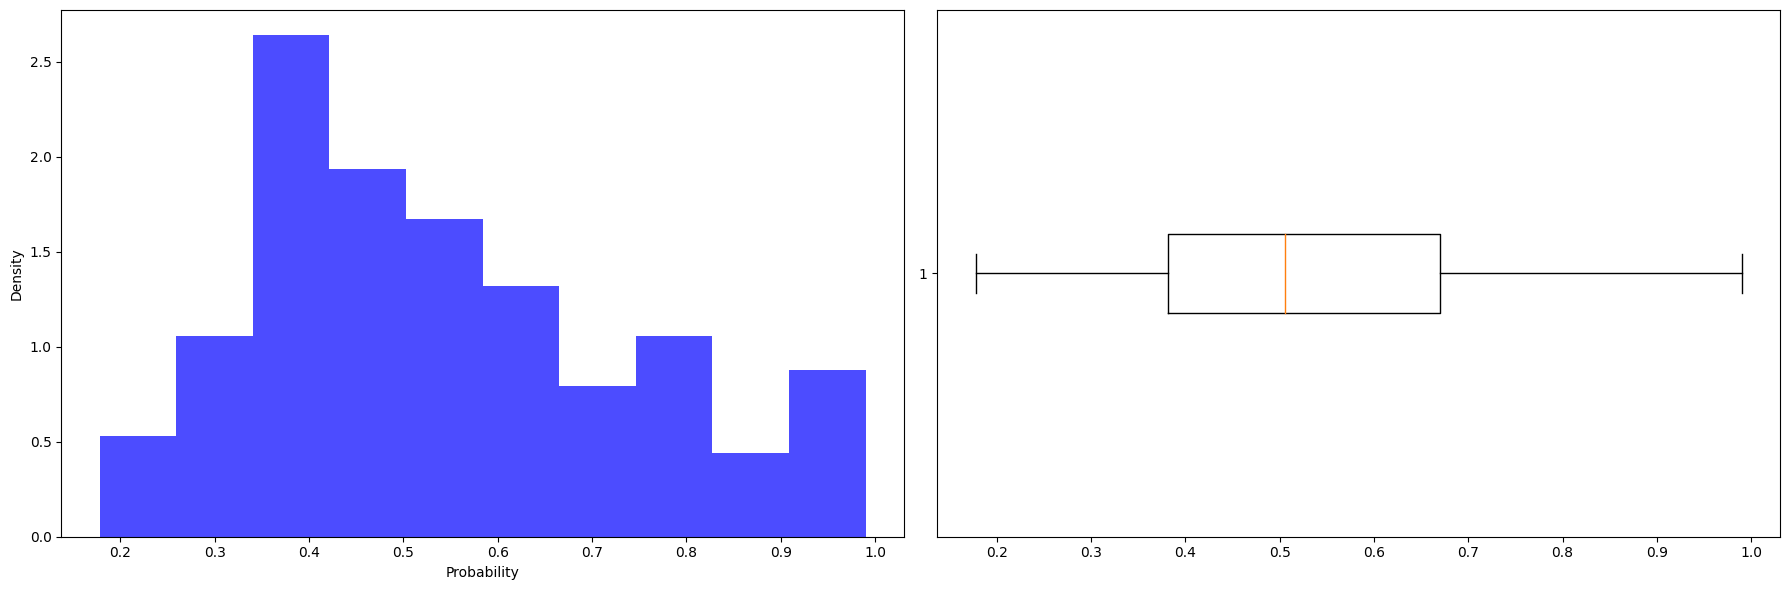

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data following a normal distribution
data = p

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].hist(data, bins=10, density=True, alpha=0.7, color='blue')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Density')

axes[1].boxplot(data, vert=False)
axes[0].set_xlabel('Probability')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


old

In [ ]:
from scipy.special import softmax
pred = []
for index, row in opinions_test.iterrows():
  chunks = split_text(row["clean_text"])
  list_ds = [{"text":c} for c in chunks]
  tokenized_case = train.tokenize_dataset(Dataset.from_list(list_ds))
  predictions = trainer.predict(tokenized_case)
  pred.append(predictions)

In [ ]:
res = []
p = []
i = 0
for index, row in opinions_test.iterrows():
  avg = softmax(pred[i].predictions, axis=1).mean(axis=0)
  res.append(np.argmax(avg))
  p.append(np.max(avg))
  i+=1
(res == opinions_test['label']).mean()

0.9084821428571429

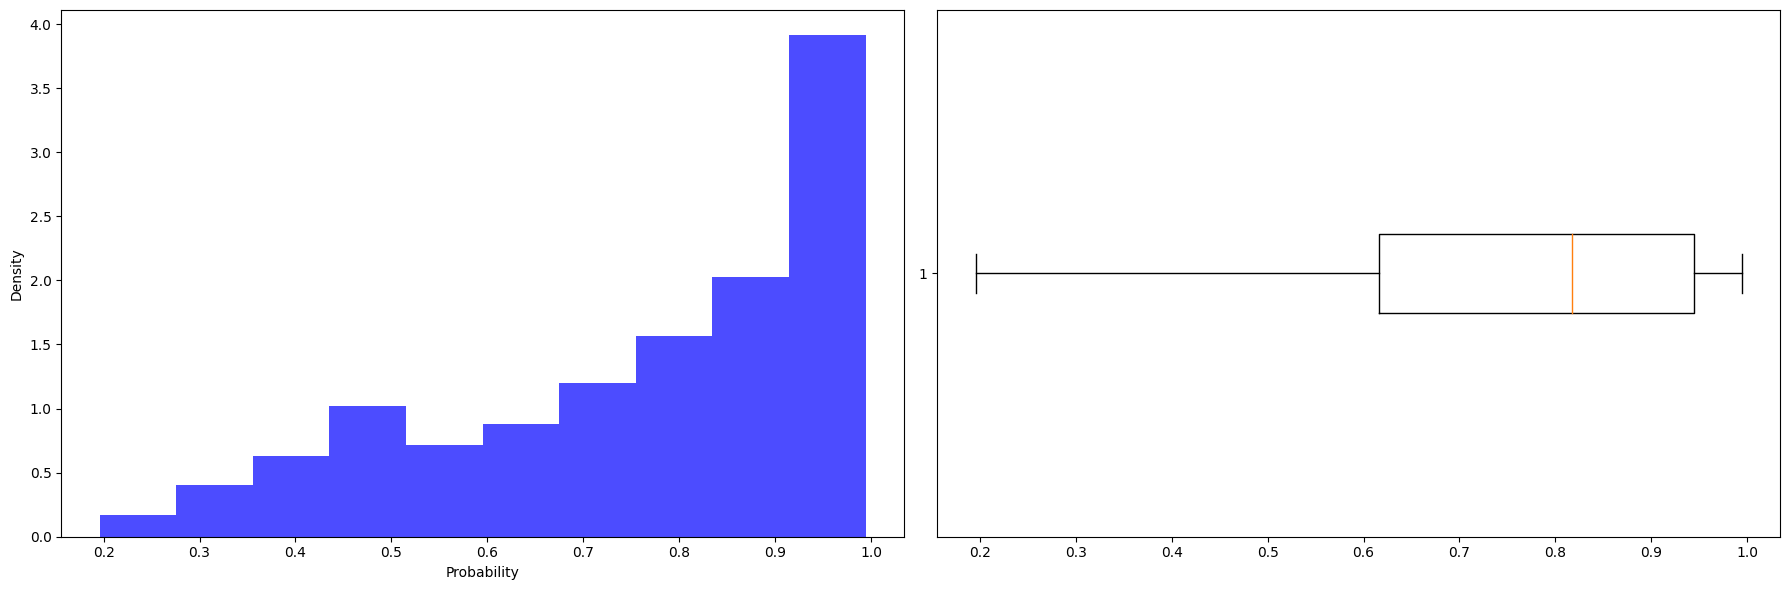

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data following a normal distribution
data = p

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].hist(data, bins=10, density=True, alpha=0.7, color='blue')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Density')

axes[1].boxplot(data, vert=False)
axes[0].set_xlabel('Probability')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


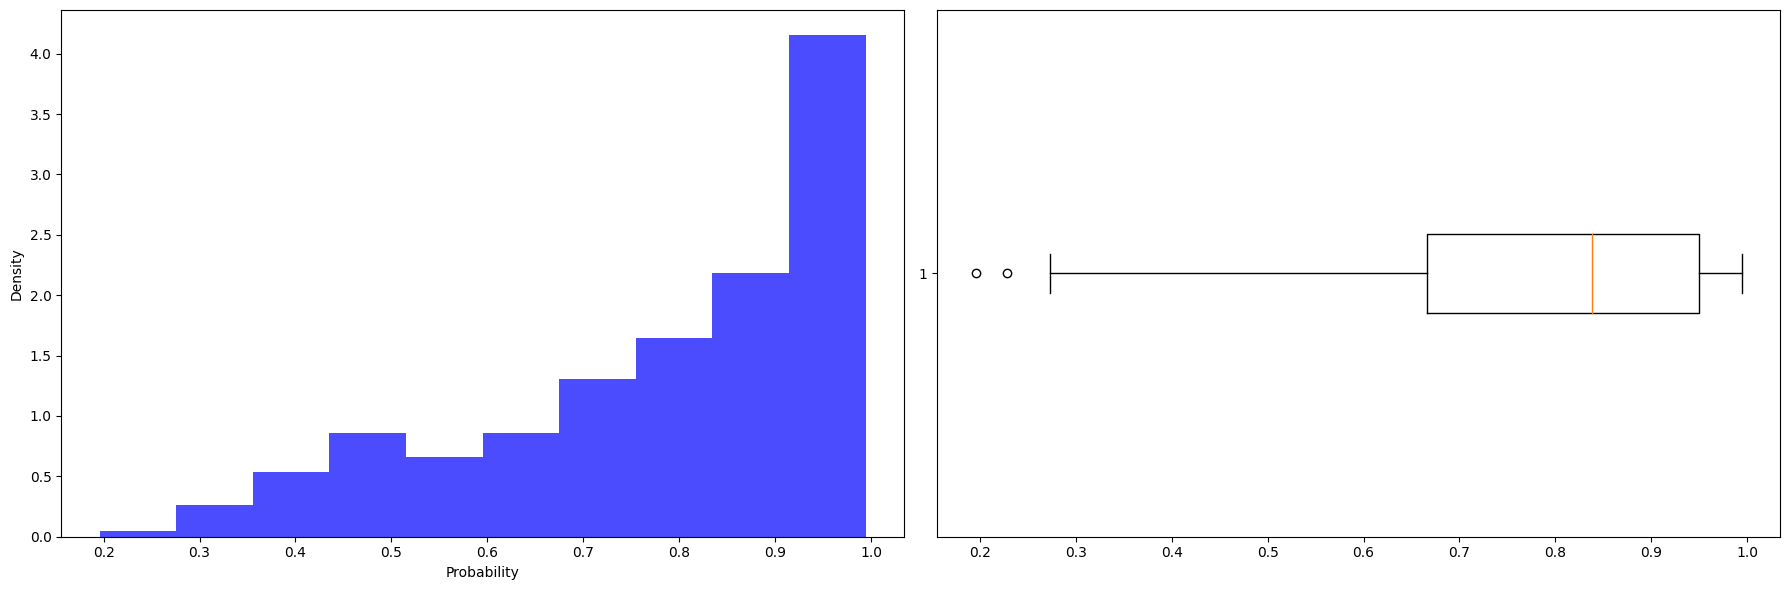

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data following a normal distribution
data = [x for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if bool_value]


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].hist(data, bins=10, density=True, alpha=0.7, color='blue')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Density')

axes[1].boxplot(data, vert=False)
axes[0].set_xlabel('Probability')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


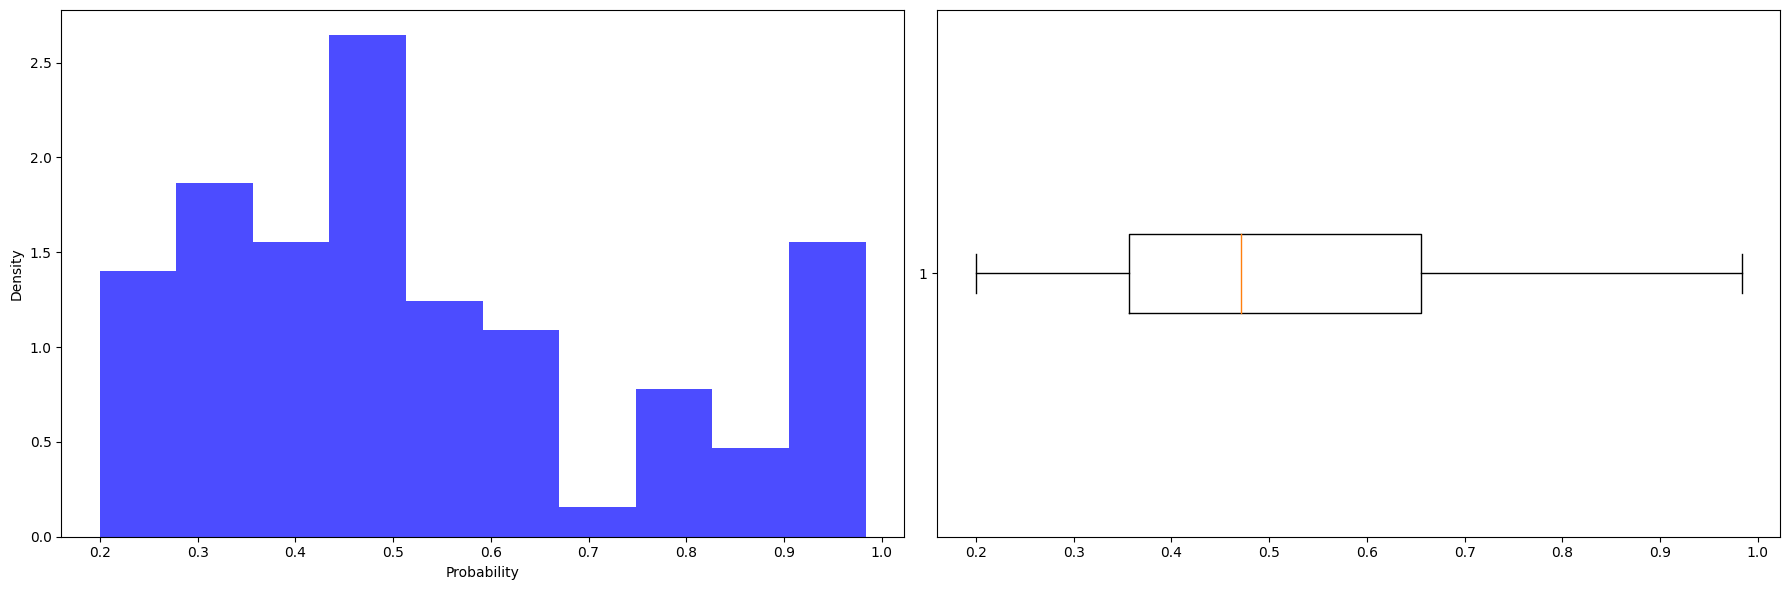

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data following a normal distribution
data = [x for x, bool_value in zip(p, (res == opinions_test['label']).tolist()) if not bool_value]


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].hist(data, bins=10, density=True, alpha=0.7, color='blue')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Density')

axes[1].boxplot(data, vert=False)
axes[0].set_xlabel('Probability')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
res = []
i = 0
for index, row in opinions_test.iterrows():
  avg = softmax(pred[i].predictions, axis=1).mean(axis=0)
  res.append(np.argsort(avg)[-2:])
  i+=1
matching = [opinions_test.iloc[i]['label'] in res[i].tolist() for i in range(len(res))]
np.mean(matching)

0.9486607142857143

In [ ]:
res = []
i = 0
for index, row in opinions_test.iterrows():
  avg = softmax(pred[i].predictions, axis=1).mean(axis=0)
  res.append(np.argsort(avg)[-3:])
  i+=1
matching = [opinions_test.iloc[i]['label'] in res[i].tolist() for i in range(len(res))]
np.mean(matching)

0.9642857142857143

In [ ]:
from utils import metrics

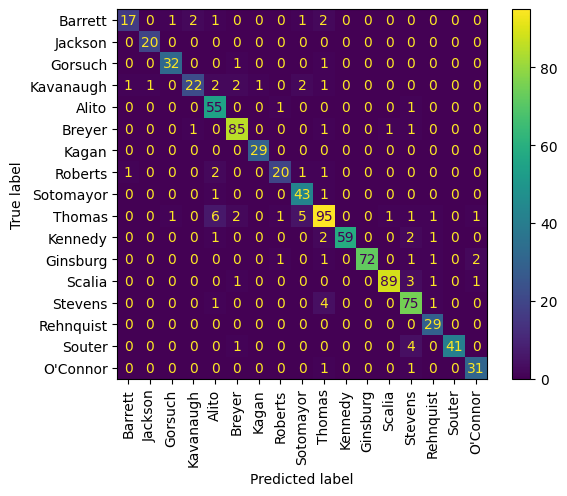

In [ ]:
metrics.plot_confusion(opinions_test['label'],res, label2id)

In [ ]:
metrics.print_metrics(opinions_test['author'],[id2label[i] for i in res])


-------------------- Key Metrics --------------------

Accuracy: 0.91
Balanced Accuracy: 0.90

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

--------------- Classification Report ---------------

              precision    recall  f1-score   support

       Alito       0.80      0.96      0.87        57
     Barrett       0.89      0.71      0.79        24
      Breyer       0.92      0.96      0.94        89
    Ginsburg       1.00      0.92      0.96        78
     Gorsuch       0.94      0.94      0.94        34
     Jackson       0.95      1.00      0.98        20
       Kagan       0.97      1.00      0.98        29
   Kavanaugh       0.88      0.69      0.77        32
     Kennedy       1.00      0.91      0.95        65
    O'Connor       0.89      0.94      0.91        33
   Rehnquist       0.85      1.00      0.92        29
  

In [ ]:
list_test = [{"text":c} for c in par_test.text]
tokenized_case = train.tokenize_dataset(Dataset.from_list(list_test))
par_model_pred = trainer.predict(tokenized_case)
l = par_model_pred.predictions.argmax(axis=1)

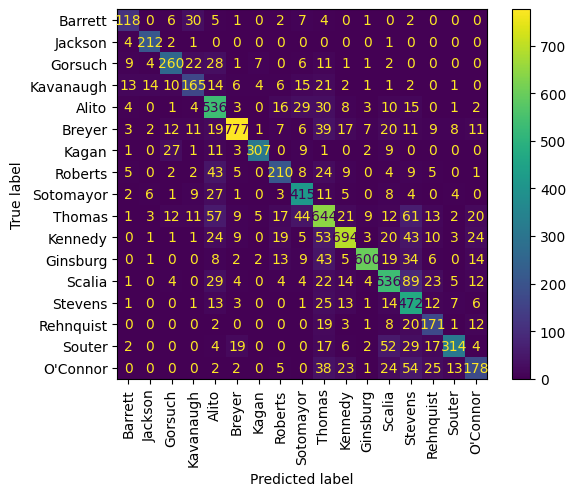

In [ ]:
metrics.plot_confusion(par_test['label'],l, label2id)

In [ ]:
metrics.print_metrics(par_test['author'],[id2label[i] for i in l])


-------------------- Key Metrics --------------------

Accuracy: 0.75
Balanced Accuracy: 0.74

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.75
Macro Recall: 0.74
Macro F1-score: 0.74

Weighted Precision: 0.76
Weighted Recall: 0.75
Weighted F1-score: 0.75

--------------- Classification Report ---------------

              precision    recall  f1-score   support

       Alito       0.65      0.81      0.72       662
     Barrett       0.72      0.67      0.69       176
      Breyer       0.92      0.81      0.86       960
    Ginsburg       0.94      0.79      0.86       756
     Gorsuch       0.77      0.74      0.75       352
     Jackson       0.87      0.96      0.92       220
       Kagan       0.94      0.83      0.88       371
   Kavanaugh       0.64      0.60      0.62       275
     Kennedy       0.85      0.76      0.80       910
    O'Connor       0.63      0.49      0.55       365
   Rehnquist       0.59      0.72      0.65       237
  